In [2]:
from torchvision.datasets import ImageFolder,FashionMNIST
from torch.utils.data import DataLoader
import torch.nn as nn
import torch
from torchvision.utils import make_grid
from torchvision import transforms
import os
import numpy as np

from tqdm import tqdm 
import matplotlib.pyplot as plt

In [3]:
dataset = FashionMNIST(root='../data',download=True,transform=transforms.Compose([transforms.Resize((64,64)),
                                                                    transforms.ToTensor()]))
dataloader = DataLoader(dataset,batch_size=32)

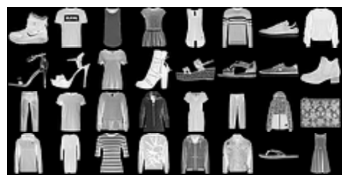

In [4]:
images,label = next(iter(dataloader))
plt.axis('off')
plt.imshow(make_grid(images,nrow=8).squeeze().permute(1,2,0))

In [5]:
# now we make a discriminator using convlution this time 
class discriminator(nn.Module):
    def __init__(self,inchannel=3,output_dim=1,feature=64):
        super(discriminator,self).__init__()
        self.layer=nn.Sequential(nn.Conv2d(inchannel,feature,4,2,1),#64*64-->32*32
                                nn.LeakyReLU(0.2),
                                self._block(feature,feature*2),#16*16
                                 self._block(feature*2,feature*4),#8*8
                                 self._block(feature*4,feature*8),#4*4
                                 self._block(feature*8,1,padding=0),#4*4-->1*1 single channel image
                                nn.Sigmoid()
                                )
        
    def _block(self,inchannel,outchannel,kernelsize=4,stride=2,padding=1):
        return nn.Sequential(
            nn.Conv2d(inchannel,outchannel,kernelsize,stride,padding,bias=False),
            nn.BatchNorm2d(outchannel),
            nn.LeakyReLU(0.2))
    def forward(self,image):
        return self.layer(image)
    
class generator(nn.Module):
    def __init__(self,noise=100,outchannels=3,feature_g=64):
        super(generator,self).__init__()
        self.gen = nn.Sequential(
                    self._block(noise,feature_g*16,stride=1,padding=0),
                    self._block(feature_g*16,feature_g*8),
                    self._block(feature_g*8,feature_g*4),
                    self._block(feature_g*4,feature_g*2),
                    nn.ConvTranspose2d(feature_g*2,outchannels,kernel_size=4,stride=2,padding=1),#this does the opposite of what a conv2d does 
                    nn.Tanh()#[-1,+1]range  outputs

        )
        
    def _block(self,inchannels,outchannel,kernel_size=4,stride=2,padding=1):
        return nn.Sequential(
        nn.ConvTranspose2d(inchannels,outchannel,kernel_size,stride,padding,bias=False),#this does the opposite of what a conv2d does 
        nn.BatchNorm2d(outchannel),
        nn.ReLU()# given in the paper
        )
    def forward(self,noise):
        return self.gen(noise)

In [8]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.05)
        nn.init.constant_(m.bias.data, 0.0)

def test():
    n,inchannel,h,w = 32,3,64,64
    z_dim = 100
    x = torch.randn((n,inchannel,h,w))
    disc = discriminator()
    print(disc(x).shape)
    init_weight(disc)
    assert disc(x).shape== (n,1,1,1)
    z = torch.randn((n,z_dim,1,1))
    gen = generator()
    init_weight(gen)
    print(gen(z).shape)
    assert gen(z).shape == (n,inchannel,h,w)
    print('success')
# test()

In [10]:
os.mkdir('../fmnist')
os.mkdir('../results')

  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]

[0/1][0/1875] Loss_D: 1.5103; Loss_G: 0.5963


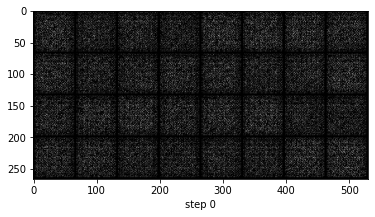


1it [00:00,  1.68it/s]
3it [00:00,  4.91it/s]
4it [00:00,  5.96it/s]
6it [00:01,  7.52it/s]
8it [00:01,  8.53it/s]
10it [00:01,  9.18it/s]
12it [00:01,  9.59it/s]
14it [00:01,  9.90it/s]
16it [00:01, 10.11it/s]
18it [00:02, 10.17it/s]
20it [00:02, 10.36it/s]

[0/1][20/1875] Loss_D: 1.5100; Loss_G: 0.5891


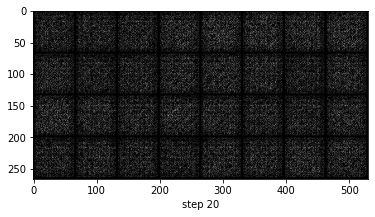


22it [00:02,  6.14it/s]
24it [00:03,  7.04it/s]
26it [00:03,  7.83it/s]
28it [00:03,  8.48it/s]
30it [00:03,  9.02it/s]
32it [00:03,  9.26it/s]
34it [00:04,  9.57it/s]
36it [00:04,  9.69it/s]
38it [00:04,  9.79it/s]
40it [00:04, 10.22it/s]

[0/1][40/1875] Loss_D: 1.4992; Loss_G: 0.5993


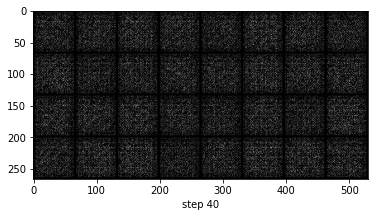


42it [00:05,  5.89it/s]
44it [00:05,  6.79it/s]
46it [00:05,  7.59it/s]
48it [00:05,  8.30it/s]
50it [00:06,  8.86it/s]
52it [00:06,  9.31it/s]
54it [00:06,  9.66it/s]
56it [00:06,  9.90it/s]
58it [00:06, 10.07it/s]
60it [00:07, 10.23it/s]

[0/1][60/1875] Loss_D: 1.5016; Loss_G: 0.6057


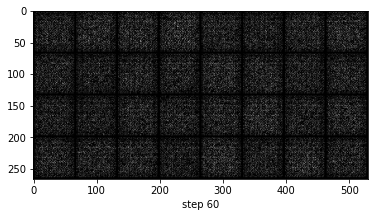


62it [00:07,  6.28it/s]
64it [00:07,  7.14it/s]
66it [00:08,  7.90it/s]
68it [00:08,  8.52it/s]
70it [00:08,  9.01it/s]
72it [00:08,  9.41it/s]
74it [00:08,  9.73it/s]
76it [00:09,  9.96it/s]
78it [00:09, 10.11it/s]
80it [00:09, 10.24it/s]

[0/1][80/1875] Loss_D: 1.5161; Loss_G: 0.6082


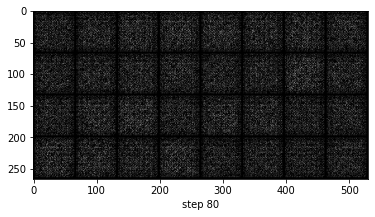


82it [00:10,  6.19it/s]
84it [00:10,  7.06it/s]
86it [00:10,  7.84it/s]
88it [00:10,  8.47it/s]
90it [00:10,  9.02it/s]
92it [00:10,  9.43it/s]
94it [00:11,  9.74it/s]
96it [00:11,  9.97it/s]
98it [00:11, 10.11it/s]
100it [00:11, 10.24it/s]

[0/1][100/1875] Loss_D: 1.5080; Loss_G: 0.5752


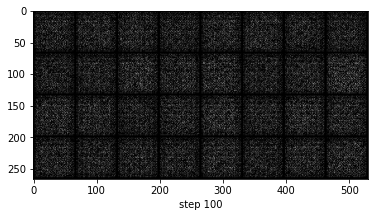


102it [00:12,  6.37it/s]
104it [00:12,  7.23it/s]
106it [00:12,  7.96it/s]
108it [00:12,  8.59it/s]
110it [00:13,  9.09it/s]
112it [00:13,  9.48it/s]
114it [00:13,  9.77it/s]
116it [00:13,  9.99it/s]
118it [00:13, 10.14it/s]
120it [00:14, 10.21it/s]

[0/1][120/1875] Loss_D: 1.5124; Loss_G: 0.5884


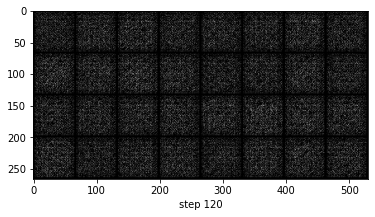


122it [00:14,  6.39it/s]
124it [00:14,  7.18it/s]
126it [00:15,  7.93it/s]
128it [00:15,  8.56it/s]
130it [00:15,  9.14it/s]
132it [00:15,  9.52it/s]
134it [00:15,  9.69it/s]
136it [00:15, 10.03it/s]
138it [00:16, 10.17it/s]
140it [00:16, 10.28it/s]

[0/1][140/1875] Loss_D: 1.5167; Loss_G: 0.5937


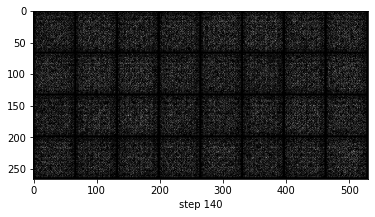


142it [00:16,  6.40it/s]
144it [00:17,  7.25it/s]
146it [00:17,  8.00it/s]
148it [00:17,  8.62it/s]
150it [00:17,  9.11it/s]
152it [00:17,  9.50it/s]
154it [00:18,  9.78it/s]
156it [00:18,  9.98it/s]
158it [00:18, 10.12it/s]
160it [00:18, 10.24it/s]

[0/1][160/1875] Loss_D: 1.4854; Loss_G: 0.5977


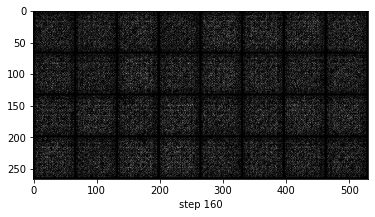


162it [00:19,  6.58it/s]
164it [00:19,  7.42it/s]
166it [00:19,  8.15it/s]
168it [00:19,  8.74it/s]
170it [00:19,  9.22it/s]
172it [00:20,  9.59it/s]
174it [00:20,  9.86it/s]
176it [00:20, 10.06it/s]
178it [00:20, 10.16it/s]
180it [00:20, 10.27it/s]

[0/1][180/1875] Loss_D: 1.4920; Loss_G: 0.6032


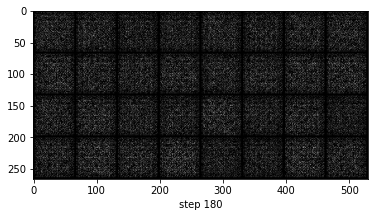


182it [00:21,  5.44it/s]
184it [00:21,  6.37it/s]
186it [00:22,  7.23it/s]
188it [00:22,  7.98it/s]
190it [00:22,  8.60it/s]
192it [00:22,  9.10it/s]
194it [00:22,  9.49it/s]
196it [00:23,  9.78it/s]
198it [00:23,  9.99it/s]
200it [00:23, 10.15it/s]

[0/1][200/1875] Loss_D: 1.5157; Loss_G: 0.5815


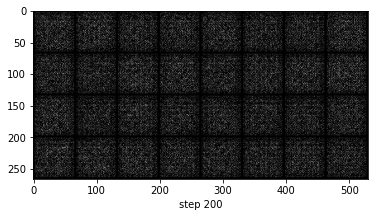


202it [00:24,  4.70it/s]
204it [00:24,  5.64it/s]
206it [00:24,  6.55it/s]
208it [00:24,  7.39it/s]
210it [00:25,  8.11it/s]
212it [00:25,  8.71it/s]
214it [00:25,  9.18it/s]
216it [00:25,  9.55it/s]
218it [00:25,  9.69it/s]
220it [00:26,  9.98it/s]

[0/1][220/1875] Loss_D: 1.5087; Loss_G: 0.5957


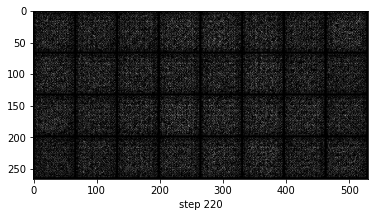


222it [00:26,  5.87it/s]
224it [00:26,  6.77it/s]
226it [00:27,  7.60it/s]
228it [00:27,  8.30it/s]
230it [00:27,  8.86it/s]
232it [00:27,  9.31it/s]
234it [00:27,  9.64it/s]
236it [00:28,  9.86it/s]
238it [00:28, 10.06it/s]
240it [00:28, 10.20it/s]

[0/1][240/1875] Loss_D: 1.5148; Loss_G: 0.5830


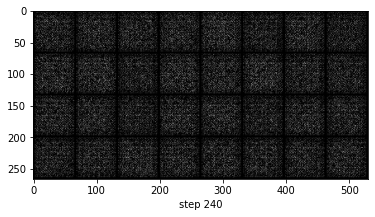


242it [00:29,  4.71it/s]
244it [00:29,  5.65it/s]
246it [00:29,  6.55it/s]
248it [00:29,  7.39it/s]
250it [00:30,  8.12it/s]
252it [00:30,  8.72it/s]
254it [00:30,  9.20it/s]
256it [00:30,  9.53it/s]
258it [00:30,  9.81it/s]
260it [00:31, 10.02it/s]

[0/1][260/1875] Loss_D: 1.4883; Loss_G: 0.6031


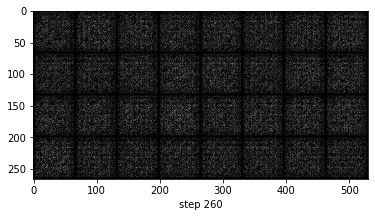


262it [00:31,  6.47it/s]
264it [00:31,  7.32it/s]
266it [00:32,  8.07it/s]
268it [00:32,  8.69it/s]
270it [00:32,  9.16it/s]
272it [00:32,  9.54it/s]
274it [00:32,  9.82it/s]
276it [00:33, 10.02it/s]
278it [00:33, 10.12it/s]
280it [00:33, 10.24it/s]

[0/1][280/1875] Loss_D: 1.4984; Loss_G: 0.5887


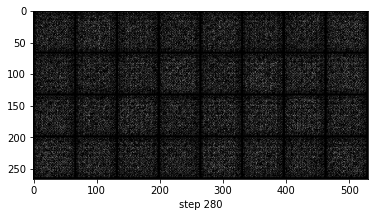


282it [00:34,  4.36it/s]
284it [00:34,  5.29it/s]
286it [00:34,  6.22it/s]
288it [00:35,  7.09it/s]
290it [00:35,  7.84it/s]
292it [00:35,  8.49it/s]
294it [00:35,  9.01it/s]
296it [00:35,  9.38it/s]
298it [00:35,  9.74it/s]
300it [00:36,  9.97it/s]

[0/1][300/1875] Loss_D: 1.4915; Loss_G: 0.5817


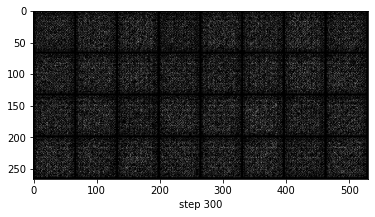


302it [00:36,  6.28it/s]
303it [00:36,  6.63it/s]
305it [00:37,  7.37it/s]
307it [00:37,  8.24it/s]
308it [00:37,  8.52it/s]
309it [00:37,  8.75it/s]
311it [00:37,  9.68it/s]
313it [00:37,  9.92it/s]
315it [00:38, 10.11it/s]
317it [00:38, 10.31it/s]
319it [00:38, 10.37it/s]

[0/1][320/1875] Loss_D: 1.5048; Loss_G: 0.5766


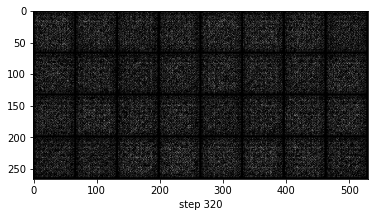


321it [00:39,  4.95it/s]
323it [00:39,  6.30it/s]
325it [00:39,  7.16it/s]
327it [00:39,  7.94it/s]
329it [00:39,  8.58it/s]
331it [00:40,  9.10it/s]
333it [00:40,  9.49it/s]
335it [00:40,  9.78it/s]
337it [00:40,  9.99it/s]
339it [00:40, 10.13it/s]

[0/1][340/1875] Loss_D: 1.5102; Loss_G: 0.5749


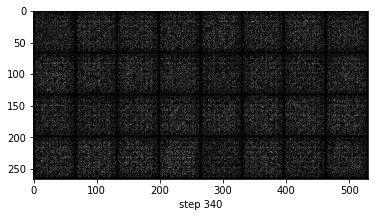


341it [00:41,  5.91it/s]
343it [00:41,  7.32it/s]
345it [00:41,  8.05it/s]
347it [00:42,  8.65it/s]
349it [00:42,  9.11it/s]
351it [00:42,  9.49it/s]
353it [00:42,  9.79it/s]
355it [00:42,  9.99it/s]
357it [00:43, 10.12it/s]
359it [00:43, 10.25it/s]

[0/1][360/1875] Loss_D: 1.5041; Loss_G: 0.5839


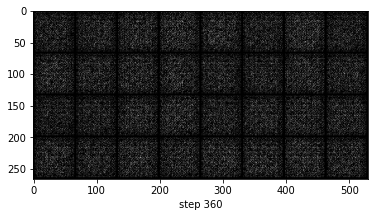


361it [00:43,  5.95it/s]
363it [00:44,  7.37it/s]
365it [00:44,  8.09it/s]
367it [00:44,  8.71it/s]
369it [00:44,  9.19it/s]
371it [00:44,  9.56it/s]
373it [00:44,  9.83it/s]
375it [00:45, 10.03it/s]
377it [00:45, 10.12it/s]
379it [00:45, 10.25it/s]

[0/1][380/1875] Loss_D: 1.5004; Loss_G: 0.5954


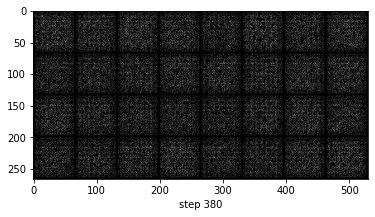


381it [00:46,  6.00it/s]
383it [00:46,  7.41it/s]
385it [00:46,  8.14it/s]
387it [00:46,  8.72it/s]
389it [00:46,  9.18it/s]
391it [00:47,  9.55it/s]
393it [00:47,  9.80it/s]
395it [00:47, 10.02it/s]
397it [00:47, 10.17it/s]
399it [00:47, 10.12it/s]

[0/1][400/1875] Loss_D: 1.5112; Loss_G: 0.5859


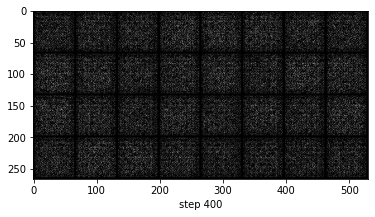


401it [00:48,  5.75it/s]
403it [00:48,  7.15it/s]
405it [00:48,  7.91it/s]
407it [00:49,  8.55it/s]
409it [00:49,  9.04it/s]
411it [00:49,  9.43it/s]
413it [00:49,  9.71it/s]
415it [00:49,  9.95it/s]
417it [00:49, 10.12it/s]
419it [00:50, 10.20it/s]

[0/1][420/1875] Loss_D: 1.5032; Loss_G: 0.5840


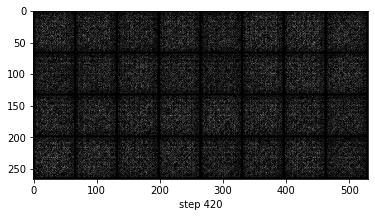


421it [00:51,  3.85it/s]
423it [00:51,  5.00it/s]
425it [00:51,  5.93it/s]
427it [00:51,  6.82it/s]
429it [00:52,  7.63it/s]
431it [00:52,  8.32it/s]
433it [00:52,  8.88it/s]
435it [00:52,  9.31it/s]
437it [00:52,  9.66it/s]
439it [00:53,  9.91it/s]

[0/1][440/1875] Loss_D: 1.5029; Loss_G: 0.5950


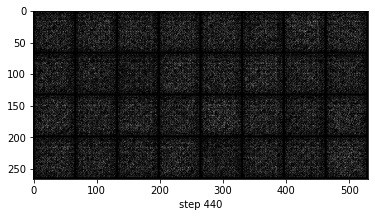


441it [00:53,  5.73it/s]
443it [00:53,  7.13it/s]
445it [00:54,  7.90it/s]
447it [00:54,  8.54it/s]
449it [00:54,  9.03it/s]
451it [00:54,  9.44it/s]
453it [00:54,  9.72it/s]
455it [00:55,  9.95it/s]
457it [00:55, 10.10it/s]
459it [00:55, 10.20it/s]

[0/1][460/1875] Loss_D: 1.5129; Loss_G: 0.5898


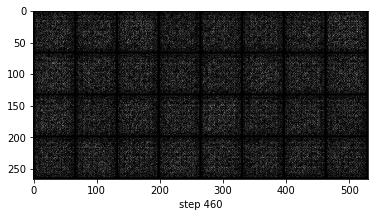


461it [00:56,  5.46it/s]
463it [00:56,  6.84it/s]
465it [00:56,  7.62it/s]
467it [00:56,  8.32it/s]
469it [00:56,  8.89it/s]
471it [00:57,  9.33it/s]
473it [00:57,  9.66it/s]
475it [00:57,  9.91it/s]
477it [00:57, 10.08it/s]
479it [00:57, 10.20it/s]

[0/1][480/1875] Loss_D: 1.5228; Loss_G: 0.5757


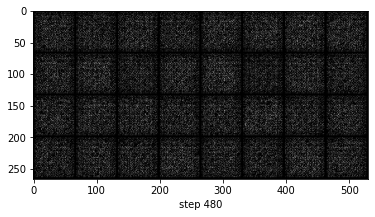


481it [00:58,  5.95it/s]
483it [00:58,  7.37it/s]
485it [00:58,  7.94it/s]
487it [00:59,  8.68it/s]
489it [00:59,  9.13it/s]
491it [00:59,  9.57it/s]
493it [00:59,  9.84it/s]
495it [00:59, 10.02it/s]
497it [00:59, 10.18it/s]
499it [01:00, 10.29it/s]

[0/1][500/1875] Loss_D: 1.5351; Loss_G: 0.5835


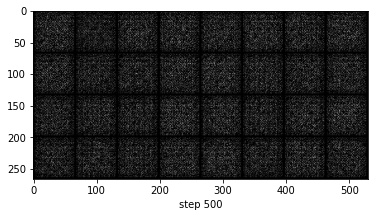


501it [01:00,  5.72it/s]
503it [01:00,  7.12it/s]
505it [01:01,  7.86it/s]
507it [01:01,  8.51it/s]
509it [01:01,  9.03it/s]
511it [01:01,  9.45it/s]
513it [01:01,  9.74it/s]
515it [01:02,  9.96it/s]
517it [01:02, 10.14it/s]
519it [01:02, 10.23it/s]

[0/1][520/1875] Loss_D: 1.5135; Loss_G: 0.5764


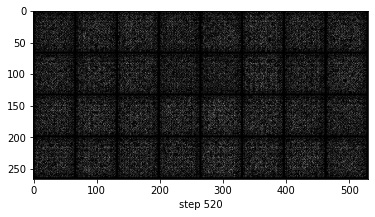


521it [01:03,  6.12it/s]
523it [01:03,  7.55it/s]
525it [01:03,  8.25it/s]
527it [01:03,  8.82it/s]
529it [01:03,  9.28it/s]
531it [01:04,  9.62it/s]
533it [01:04,  9.89it/s]
535it [01:04, 10.08it/s]
537it [01:04, 10.21it/s]
539it [01:04, 10.30it/s]

[0/1][540/1875] Loss_D: 1.5018; Loss_G: 0.5904


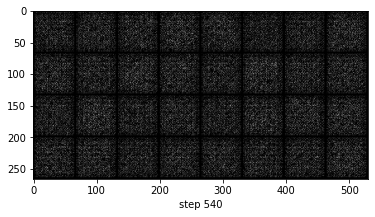


541it [01:05,  5.97it/s]
543it [01:05,  7.38it/s]
545it [01:05,  8.12it/s]
547it [01:05,  8.72it/s]
549it [01:06,  9.20it/s]
551it [01:06,  9.56it/s]
553it [01:06,  9.84it/s]
555it [01:06, 10.03it/s]
557it [01:06, 10.18it/s]
559it [01:07, 10.28it/s]

[0/1][560/1875] Loss_D: 1.5396; Loss_G: 0.5739


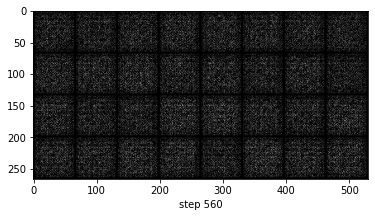


561it [01:07,  6.12it/s]
563it [01:07,  7.55it/s]
565it [01:08,  8.25it/s]
567it [01:08,  8.82it/s]
569it [01:08,  9.27it/s]
571it [01:08,  9.59it/s]
573it [01:08,  9.83it/s]
575it [01:08, 10.01it/s]
577it [01:09, 10.14it/s]
579it [01:09, 10.25it/s]

[0/1][580/1875] Loss_D: 1.4988; Loss_G: 0.5915


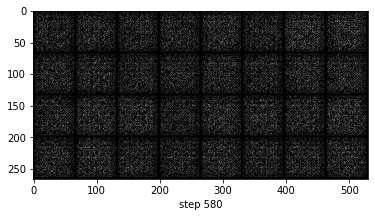


581it [01:10,  4.06it/s]
583it [01:10,  5.16it/s]
585it [01:10,  6.09it/s]
587it [01:11,  6.97it/s]
589it [01:11,  7.79it/s]
591it [01:11,  8.43it/s]
593it [01:11,  8.97it/s]
595it [01:11,  9.38it/s]
597it [01:12,  9.70it/s]
599it [01:12,  9.94it/s]

[0/1][600/1875] Loss_D: 1.5203; Loss_G: 0.5972


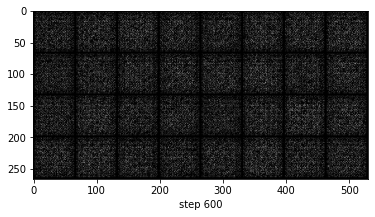


601it [01:13,  5.29it/s]
603it [01:13,  6.64it/s]
605it [01:13,  7.48it/s]
607it [01:13,  8.19it/s]
609it [01:13,  8.76it/s]
611it [01:13,  9.20it/s]
613it [01:14,  9.56it/s]
615it [01:14,  9.77it/s]
617it [01:14,  9.99it/s]
619it [01:14, 10.15it/s]

[0/1][620/1875] Loss_D: 1.5026; Loss_G: 0.5902


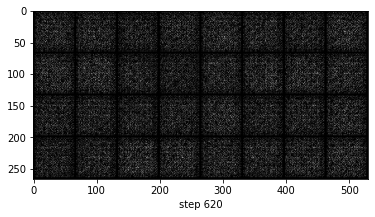


621it [01:15,  5.80it/s]
623it [01:15,  7.20it/s]
625it [01:15,  7.93it/s]
627it [01:15,  8.56it/s]
629it [01:16,  9.09it/s]
631it [01:16,  9.49it/s]
633it [01:16,  9.77it/s]
635it [01:16,  9.99it/s]
637it [01:16, 10.15it/s]
639it [01:16, 10.26it/s]

[0/1][640/1875] Loss_D: 1.4900; Loss_G: 0.5836


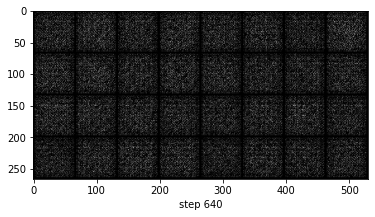


641it [01:18,  3.75it/s]
643it [01:18,  4.88it/s]
645it [01:18,  5.82it/s]
647it [01:18,  6.72it/s]
649it [01:18,  7.54it/s]
651it [01:19,  8.24it/s]
653it [01:19,  8.82it/s]
655it [01:19,  9.26it/s]
657it [01:19,  9.59it/s]
659it [01:19,  9.83it/s]

[0/1][660/1875] Loss_D: 1.5040; Loss_G: 0.5936


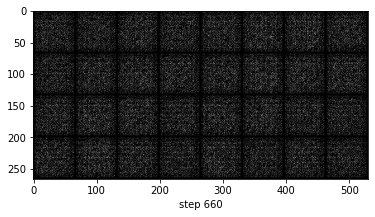


661it [01:20,  5.75it/s]
663it [01:20,  7.14it/s]
665it [01:20,  7.83it/s]
667it [01:21,  8.50it/s]
669it [01:21,  9.07it/s]
671it [01:21,  9.45it/s]
673it [01:21,  9.76it/s]
675it [01:21,  9.98it/s]
677it [01:22, 10.11it/s]
679it [01:22, 10.23it/s]

[0/1][680/1875] Loss_D: 1.5215; Loss_G: 0.5829


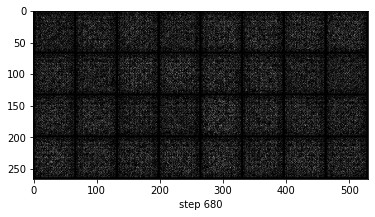


681it [01:23,  5.58it/s]
683it [01:23,  6.96it/s]
685it [01:23,  7.76it/s]
687it [01:23,  8.43it/s]
689it [01:23,  8.96it/s]
691it [01:23,  9.38it/s]
693it [01:24,  9.71it/s]
695it [01:24,  9.94it/s]
697it [01:24, 10.12it/s]
699it [01:24, 10.24it/s]

[0/1][700/1875] Loss_D: 1.5042; Loss_G: 0.5914


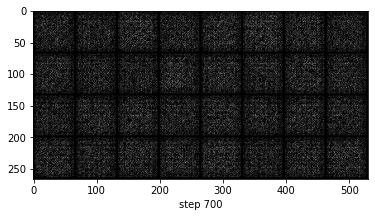


701it [01:25,  6.08it/s]
703it [01:25,  7.47it/s]
705it [01:25,  8.20it/s]
707it [01:25,  8.78it/s]
709it [01:25,  9.24it/s]
711it [01:26,  9.60it/s]
713it [01:26,  9.83it/s]
715it [01:26, 10.03it/s]
717it [01:26, 10.14it/s]
719it [01:26, 10.28it/s]

[0/1][720/1875] Loss_D: 1.5112; Loss_G: 0.5962


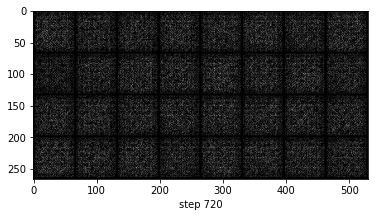


721it [01:27,  5.87it/s]
723it [01:27,  7.27it/s]
725it [01:27,  8.00it/s]
727it [01:28,  8.62it/s]
729it [01:28,  9.11it/s]
731it [01:28,  9.51it/s]
733it [01:28,  9.79it/s]
735it [01:28, 10.01it/s]
737it [01:29, 10.16it/s]
739it [01:29, 10.27it/s]

[0/1][740/1875] Loss_D: 1.4988; Loss_G: 0.5957


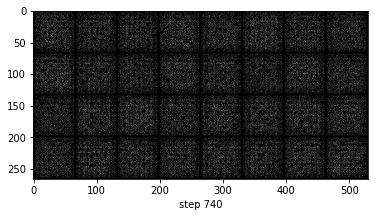


741it [01:29,  5.99it/s]
743it [01:30,  7.41it/s]
745it [01:30,  8.14it/s]
747it [01:30,  8.74it/s]
749it [01:30,  9.21it/s]
751it [01:30,  9.56it/s]
753it [01:30,  9.82it/s]
755it [01:31, 10.02it/s]
757it [01:31, 10.17it/s]
759it [01:31, 10.27it/s]

[0/1][760/1875] Loss_D: 1.4956; Loss_G: 0.6064


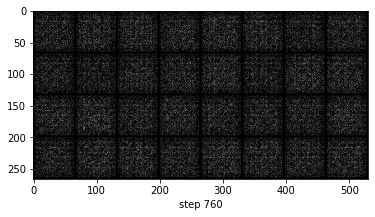


761it [01:32,  4.97it/s]
763it [01:32,  6.27it/s]
765it [01:32,  7.13it/s]
767it [01:32,  7.90it/s]
769it [01:33,  8.53it/s]
771it [01:33,  9.04it/s]
773it [01:33,  9.44it/s]
775it [01:33,  9.74it/s]
777it [01:33,  9.99it/s]
779it [01:34, 10.14it/s]

[0/1][780/1875] Loss_D: 1.5101; Loss_G: 0.5885


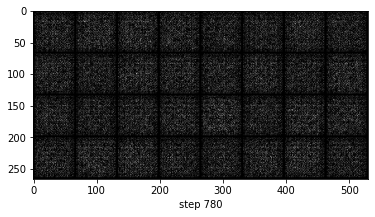


781it [01:35,  4.70it/s]
783it [01:35,  5.99it/s]
785it [01:35,  6.87it/s]
787it [01:35,  7.67it/s]
789it [01:35,  8.35it/s]
791it [01:35,  8.91it/s]
793it [01:36,  9.35it/s]
795it [01:36,  9.68it/s]
797it [01:36,  9.88it/s]
799it [01:36, 10.08it/s]

[0/1][800/1875] Loss_D: 1.5082; Loss_G: 0.6050


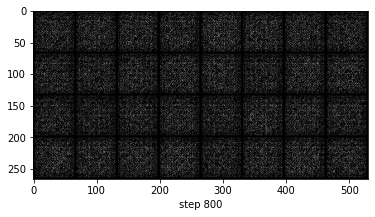


801it [01:37,  5.71it/s]
803it [01:37,  7.08it/s]
805it [01:37,  7.85it/s]
807it [01:37,  8.47it/s]
809it [01:38,  9.00it/s]
811it [01:38,  9.41it/s]
813it [01:38,  9.70it/s]
815it [01:38,  9.96it/s]
817it [01:38, 10.07it/s]
819it [01:39, 10.20it/s]

[0/1][820/1875] Loss_D: 1.5030; Loss_G: 0.5882


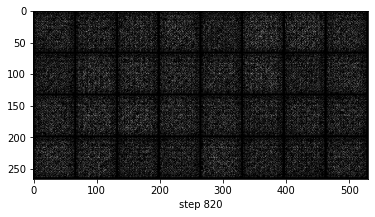


821it [01:40,  4.47it/s]
823it [01:40,  5.72it/s]
825it [01:40,  6.63it/s]
827it [01:40,  7.45it/s]
829it [01:40,  8.16it/s]
831it [01:40,  8.75it/s]
833it [01:41,  9.23it/s]
835it [01:41,  9.59it/s]
837it [01:41,  9.84it/s]
839it [01:41, 10.06it/s]

[0/1][840/1875] Loss_D: 1.5059; Loss_G: 0.6123


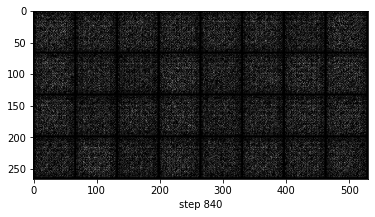


841it [01:42,  5.82it/s]
843it [01:42,  7.23it/s]
845it [01:42,  7.86it/s]
847it [01:42,  8.41it/s]
849it [01:43,  8.93it/s]
851it [01:43,  9.07it/s]
853it [01:43,  9.49it/s]
855it [01:43,  9.68it/s]
857it [01:43, 10.11it/s]
859it [01:44, 10.20it/s]

[0/1][860/1875] Loss_D: 1.5187; Loss_G: 0.5948


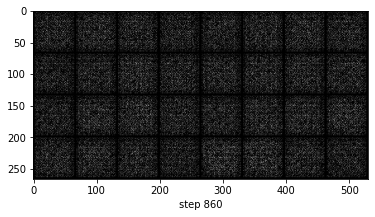


861it [01:45,  4.43it/s]
863it [01:45,  5.68it/s]
865it [01:45,  6.57it/s]
867it [01:45,  7.40it/s]
869it [01:45,  8.05it/s]
871it [01:46,  8.71it/s]
873it [01:46,  9.19it/s]
875it [01:46,  9.57it/s]
877it [01:46,  9.81it/s]
879it [01:46, 10.02it/s]

[0/1][880/1875] Loss_D: 1.5303; Loss_G: 0.5852


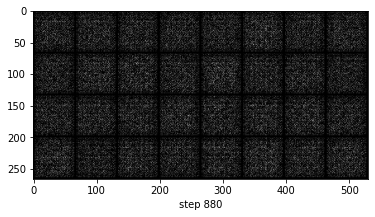


881it [01:47,  5.78it/s]
883it [01:47,  7.17it/s]
885it [01:47,  7.93it/s]
887it [01:47,  8.55it/s]
889it [01:48,  9.04it/s]
891it [01:48,  9.43it/s]
893it [01:48,  9.74it/s]
895it [01:48,  9.90it/s]
897it [01:48, 10.08it/s]
899it [01:49, 10.17it/s]

[0/1][900/1875] Loss_D: 1.4901; Loss_G: 0.5990


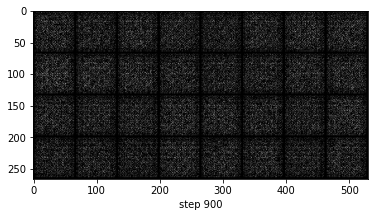


901it [01:50,  4.47it/s]
903it [01:50,  5.72it/s]
905it [01:50,  6.63it/s]
907it [01:50,  7.46it/s]
909it [01:50,  8.17it/s]
911it [01:51,  8.71it/s]
913it [01:51,  9.19it/s]
915it [01:51,  9.56it/s]
917it [01:51,  9.83it/s]
919it [01:51, 10.02it/s]

[0/1][920/1875] Loss_D: 1.5141; Loss_G: 0.5812


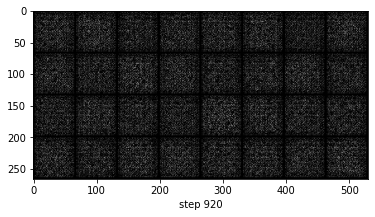


921it [01:52,  5.77it/s]
923it [01:52,  7.18it/s]
925it [01:52,  7.92it/s]
927it [01:52,  8.57it/s]
929it [01:53,  9.08it/s]
931it [01:53,  9.48it/s]
933it [01:53,  9.76it/s]
935it [01:53,  9.98it/s]
937it [01:53, 10.02it/s]
939it [01:54, 10.18it/s]

[0/1][940/1875] Loss_D: 1.5359; Loss_G: 0.5938


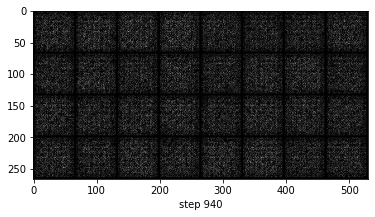


941it [01:55,  4.46it/s]
943it [01:55,  5.71it/s]
945it [01:55,  6.62it/s]
947it [01:55,  7.43it/s]
949it [01:55,  8.15it/s]
951it [01:56,  8.74it/s]
953it [01:56,  9.21it/s]
955it [01:56,  9.54it/s]
957it [01:56,  9.82it/s]
959it [01:56, 10.02it/s]

[0/1][960/1875] Loss_D: 1.5179; Loss_G: 0.5984


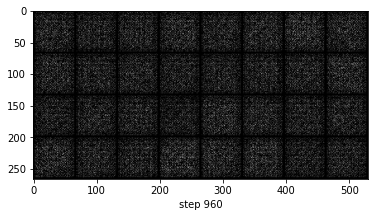


961it [01:57,  5.73it/s]
963it [01:57,  7.09it/s]
965it [01:57,  7.86it/s]
967it [01:58,  8.50it/s]
969it [01:58,  9.03it/s]
971it [01:58,  9.43it/s]
973it [01:58,  9.73it/s]
975it [01:58,  9.98it/s]
977it [01:58, 10.15it/s]
979it [01:59, 10.24it/s]

[0/1][980/1875] Loss_D: 1.5045; Loss_G: 0.5920


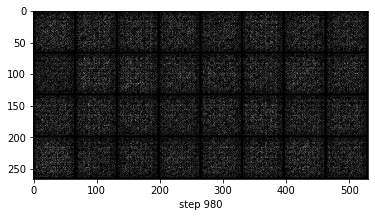


981it [02:00,  5.13it/s]
983it [02:00,  6.45it/s]
985it [02:00,  7.30it/s]
987it [02:00,  8.03it/s]
989it [02:00,  8.65it/s]
991it [02:00,  9.15it/s]
993it [02:01,  9.53it/s]
995it [02:01,  9.82it/s]
997it [02:01, 10.03it/s]
999it [02:01, 10.17it/s]

[0/1][1000/1875] Loss_D: 1.5180; Loss_G: 0.5783


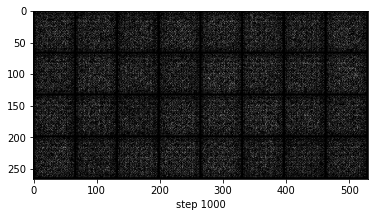


1001it [02:02,  5.95it/s]
1003it [02:02,  7.35it/s]
1005it [02:02,  8.07it/s]
1007it [02:02,  8.67it/s]
1009it [02:03,  9.15it/s]
1011it [02:03,  9.54it/s]
1013it [02:03,  9.79it/s]
1015it [02:03,  9.95it/s]
1017it [02:03, 10.07it/s]
1019it [02:03, 10.22it/s]

[0/1][1020/1875] Loss_D: 1.5004; Loss_G: 0.5945


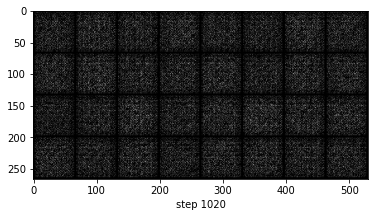


1021it [02:04,  5.80it/s]
1023it [02:04,  7.14it/s]
1025it [02:04,  7.92it/s]
1027it [02:05,  8.50it/s]
1029it [02:05,  9.08it/s]
1031it [02:05,  9.45it/s]
1033it [02:05,  8.21it/s]
  0%|          | 0/1 [02:05<?, ?it/s]


KeyboardInterrupt: 

In [12]:
batch_size=32
z_dim = 100
gen = generator(outchannels=1)
disc = discriminator(inchannel=1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
# print(count_parameters(gen))

g_opt = torch.optim.Adam(gen.parameters(),lr=2e-4,betas=(0.5,0.7))
d_opt = torch.optim.Adam(gen.parameters(),lr=2e-4,betas=(0.5,0.999))

criterion = nn.BCELoss()


## earlier the model sizze was somewhere 41 million parameters and disc had 3.9 billion 😂😂
# just because the images were 250*250 and the number of layers were wayyyy more than required

epochs = 1
gen.to(device)
disc.to(device)
gen.apply(weights_init)
disc.apply(weights_init)

fixed_noise = torch.randn(32,z_dim,1,1).to(device)
Loss_g = []
Loss_d = []

gen.train()
disc.train()
# RUNNING THIS THING GAVE ME AN ERROR SO I CHANGE THE DISCRIMINATOR OR USE TESTING TO CHECK FOR ERRORS
for i in tqdm(range(epochs)):
    for j,(images,_) in tqdm(enumerate(dataloader,0)):
        realimage = images.to(device)
        noise = torch.randn(realimage.shape[0],z_dim,1,1).to(device)
        disc_out_real = disc(realimage).reshape(-1)
        err_dreal = criterion(disc_out_real,torch.ones(realimage.size()[0],device=device))
        # Training the discriminator with a fake image generated by the generator
        fake_img = gen(noise)
        disc_out_fake = disc(fake_img.detach()).view(-1)#I think we detach to retain the gradient correct me if i am wrong
        fake_label = torch.zeros_like(disc_out_fake,device=device)
        err_dfake = criterion(disc_out_fake,fake_label)
        # now backpropagating error
        disc.zero_grad()
        errD = err_dreal + err_dfake
        errD.backward()
        d_opt.step()

        ## TRaining Generator
        gen.zero_grad()
        output = disc(fake_img.detach()).view(-1)
        target = torch.ones_like(output)
        errG = criterion(output, target)
        errG.backward()
        g_opt.step()

        Loss_g.append(errG)
        Loss_d.append(errD)

        # 3rd Step: Printing the losses and saving the real images and the generated images of the minibatch every 100 steps
        with torch.no_grad():
            if j % 20 == 0:
                print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (i, epochs, j, len(dataloader), errD.item(), errG.item()))

                size=(1,64,64)
                plt.imshow(make_grid(fake_img.detach().cpu().view(32,*size)).permute(1, 2, 0).squeeze())
                plt.xlabel(f'step {j}')
                plt.show()
                torch.save({'gen':gen.state_dict(),
               'gopt':g_opt.state_dict()
               },'../fmnist/DCGanFmnist.pth')
                torch.save({'disc':disc.state_dict(),
                'dopt':d_opt.state_dict()
               },'../fmnist/DCDiscFmnist.pth')

                torch.save(criterion.state_dict(),'../fmnist/DCFmnistcriterionv2.pth')

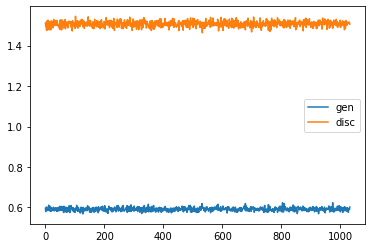

In [13]:
plt.plot(Loss_g,label='gen')
plt.plot(Loss_d,label='disc')
plt.legend()
plt.show()